# Predicting Employee Satisfaction using Public Sector Commission Employee Perception Survey 2015 EDA
*Work in Progress

Author: <div class="LI-profile-badge"  data-version="v1" data-size="medium" data-locale="en_US" data-type="horizontal" data-theme="dark" data-vanity="aroraaman"><a class="LI-simple-link" href='https://au.linkedin.com/in/aroraaman?trk=profile-badge'>Aman Arora</a></div> 

This work has been influenced by Plotly tutorial on Kaggle https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners

**IMPORTANT:** <br>
Please refer to: <br>

https://nbviewer.jupyter.org/github/arora-aman123/Data_Science_Projects/blob/master/Predicting%20Employee%20Satisfaction%20using%20GOV%20data/Predicting%20Employee%20Satisfaction%20using%20Public%20Sector%20Commission%20Employee%20Perception%20Survey%202015.ipynb  

<br>
*Above is a nbviewer render for the same notebook below. 

### Importing Data

In [1]:
#libraries
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np

#config
# pd.set_option('display.max_colwidth', -1)

# pd.set_option("display.max_rows",120)
pd.set_option("display.max_columns",120)

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data_path = '/Users/user/Desktop/Folders/Data_Scientist/data/public-sector-commission-eps-2015-data.xlsx'

#read files
survey = pd.read_excel(data_path, 
                       na_values = 8,
                       sheet_name = 'Data')

survey_question = pd.read_excel(data_path,
                                na_values = 8,
                                sheet_name = 'Question key')

survey_answer_values = pd.read_excel(data_path,
                                sheet_name = 'Response key')

#create dictionary
survey_dict = dict(zip(survey_question['Question ID'], survey_question['Question ']))

In [3]:
columns = list(survey_dict.values())

In [4]:
# columns[0]
# import re
# a = columns
# clean_columns = []
# for col in columns:
#     for k in col.split("\n"):
#         col = re.sub(r"[^a-zA-Z]+", ' ', k).rstrip().replace(' ','_').lower()
#         clean_columns.append(col)
        
# survey.columns = clean_columns

### EDA

In [5]:
survey_question_key_df = pd.DataFrame(survey_dict, index = ['Question']).T

In [6]:
survey.shape

(11405, 110)

In [7]:
survey.rename(columns={ survey.columns[0]: "target" },inplace = True)

In [8]:
survey.head()

,target,A1b,A2a,A2b,A2c,A2d,A2e,A2f,A2g,A2h,A3a,A3b,A3c,A3d,A3e,A3f,A3g,A3h,A3i,A3j,A3k,A3l,A3m,A4,A4ai,A4aii,A4aiii,A4aiv,A4av,A4avi,A4avii,B1a,B1b,B2a,B2b,B2c,B2d,B3a,B3b,B3c,B3d,B4a,B4b,B4c,B4d,B5a,B5b,B5c,B5d,B6,B7a,B7b,B7c,B7d,B7e,B8,B8ai,B8aii,B8aiii,B8aiv,B8av,B8avi,B8avii,B9,C1a,C1b,C1c,C1d,C1e,C1f,C1g,C2,C3,C4a,C4b,C4c,C4d,C4e,C4f,C4g,C4h,C4i,C4j,C4k,C4l,C4m,C4n,C4o,C4ii,C5,C6,C6ai,C6aii,C6aiii,C6aiv,C6av,C6avi,C6avii,C6aviii,C6aix,C6ax,C6axi,C7,C8,C9,D1,D3,D8,D14,AgencySize
0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,4.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,1.0,2.0,3.0,2.0,3
1,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,3.0,4.0,4.0,4.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1.0,1.0,1.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0,3.0,5.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,3.0,3.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,3.0,2.0,3
2,6.0,5.0,6.0,6.0,5.0,7.0,7.0,7.0,7.0,3.0,4.0,4.0,4.0,4.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,4.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,7.0,7.0,5.0,5.0,7.0,7.0,4.0,5.0,5.0,5.0,7.0,4.0,6.0,6.0,4.0,3.0,3.0,3.0,1.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,4.0,4.0,5.0,5.0,4.0,3.0,1.0,1.0,5.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,3.0,2.0,2.0,2.0,2.0,3
3,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,1.0,1.0,2.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,3.0,3.0,2.0,1.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,3.0,NaN,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,2.0,1.0,2.0,2.0,3
4,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,1.0,1.0,1.0,2.0,3


In [9]:
survey['target'].isnull().sum()

70

**MISSING VALUES**

In [10]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
#Function call 
missing_values_df = missing_values_table(survey)
missing_values_df.head()

Your selected dataframe has 110 columns.
There are 109 columns that have missing values.


,Missing Values,% of Total Values
B7b,11384,99.8
C6aviii,11263,98.8
A4av,11255,98.7
C6aiii,11232,98.5
C6aiv,11195,98.2


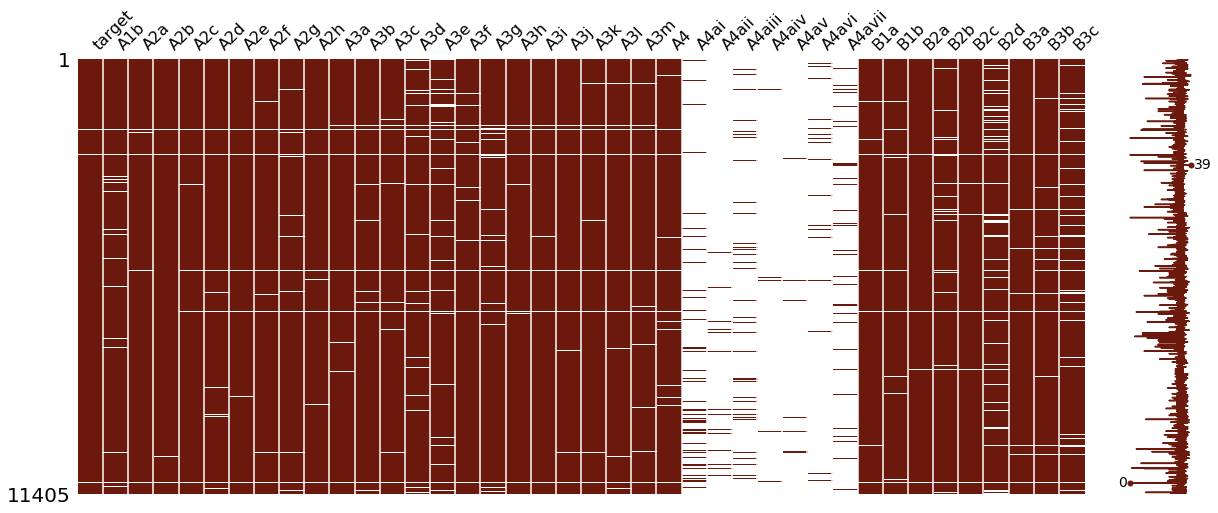

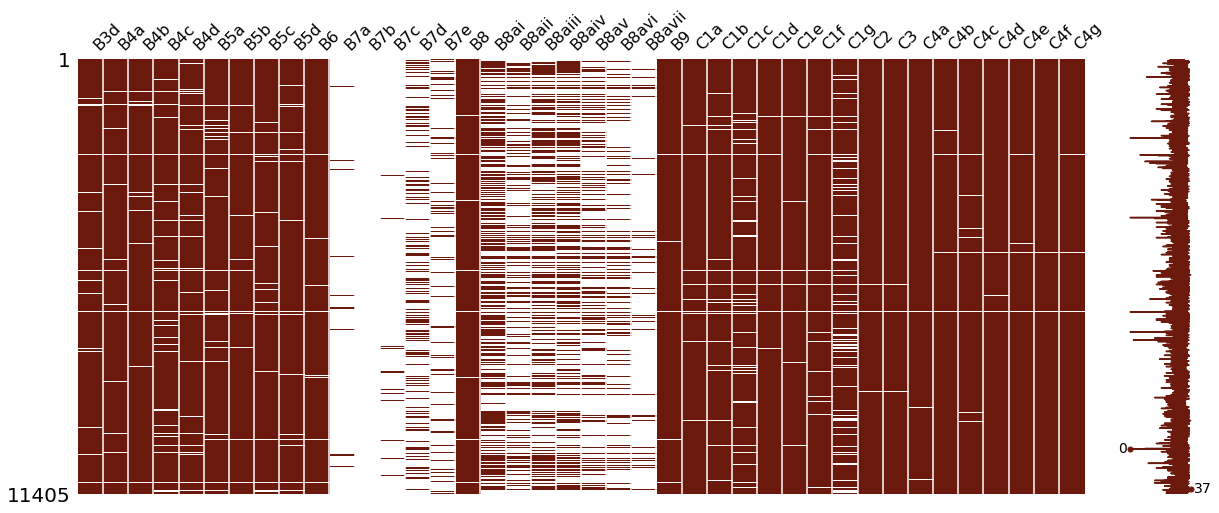

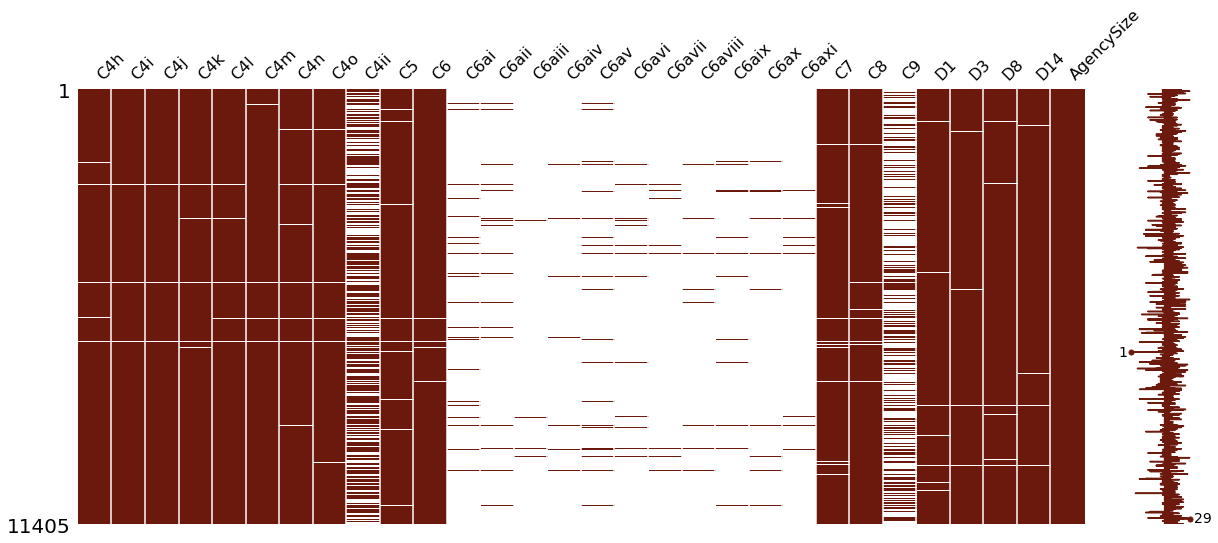

In [11]:
import missingno as msno
#Missing values by columns
msno.matrix(df=survey.iloc[:,:40], figsize=(20, 8),
            color=(0.42, 0.1, 0.05));
plt.show()

msno.matrix(df=survey.iloc[:,40:80], figsize=(20, 8),
            color=(0.42, 0.1, 0.05));
plt.show()

msno.matrix(df=survey.iloc[:,80:], figsize=(20, 8),
            color=(0.42, 0.1, 0.05));
plt.show()

Clearly a lot of missing values exist from columns A4-A4avii, B6-B7e, B8-B8avii, C4ii, C6ai-C6axi.

In [12]:
survey.dtypes.value_counts()

float64    109
int64        1
dtype: int64

**DROP COLUMNS**

In [13]:
cols_to_drop = missing_values_df[missing_values_df['% of Total Values']>40].index.values
survey.drop(columns = cols_to_drop, axis = 1,inplace = True)

**NUMBER OF UNIQUE CLASSES IN EACH COLUMN**

In [14]:
survey.apply(pd.Series.nunique, axis = 0)[survey.apply(pd.Series.nunique, axis = 0) == 2]

C2     2
C3     2
C5     2
C7     2
D1     2
D3     2
D14    2
dtype: int64

In [15]:
survey.shape

(11405, 78)

In [16]:
survey.describe()

,target,A1b,A2a,A2b,A2c,A2d,A2e,A2f,A2g,A2h,A3a,A3b,A3c,A3d,A3e,A3f,A3g,A3h,A3i,A3j,A3k,A3l,A3m,A4,B1a,B1b,B2a,B2b,B2c,B2d,B3a,B3b,B3c,B3d,B4a,B4b,B4c,B4d,B5a,B5b,B5c,B5d,B6,B8,B9,C1a,C1b,C1c,C1d,C1e,C1f,C1g,C2,C3,C4a,C4b,C4c,C4d,C4e,C4f,C4g,C4h,C4i,C4j,C4k,C4l,C4m,C4n,C4o,C5,C6,C7,C8,D1,D3,D8,D14,AgencySize
count,11335.000000,10985.000000,11344.000000,11330.000000,11273.000000,11306.000000,11332.000000,11276.000000,11123.000000,11318.000000,11288.000000,11191.000000,11155.000000,11046.000000,10851.000000,11220.000000,11123.000000,11257.000000,11267.000000,11272.000000,11261.000000,11248.000000,11236.000000,11090.000000,11320.000000,11212.000000,11333.000000,11004.000000,11267.000000,10273.000000,11185.000000,11132.000000,10616.000000,11124.000000,11197.000000,11149.000000,10986.000000,10880.000000,10932.000000,11172.000000,11069.000000,11157.000000,11314.000000,11285.000000,11317.000000,11252.000000,11046.000000,10498.000000,11228.000000,11233.000000,11038.000000,10051.000000,11306.000000,11263.000000,11346.000000,11293.000000,11214.000000,11308.000000,11321.000000,11319.000000,11317.000000,11310.000000,11318.000000,11320.000000,11313.000000,11312.000000,11303.000000,11299.000000,11274.000000,11192.000000,11335.000000,11231.000000,11308.000000,11292.000000,11359.000000,11294.000000,11286.000000,11405.000000
mean,2.281782,2.851707,2.132581,1.975199,1.787368,2.366177,2.293152,3.093739,3.536546,2.282294,3.269224,3.673666,3.353384,3.264349,3.480509,3.036898,2.944080,3.050902,2.933168,3.275195,3.201847,2.598951,3.016999,2.622904,3.188693,3.224492,2.379246,2.562704,2.703382,3.314903,2.310416,2.007815,2.427656,1.856077,2.754756,2.523276,2.986255,3.314430,2.504757,2.051110,1.831421,1.859192,1.646456,1.460434,2.949898,1.901173,2.438620,2.801295,1.979872,1.975341,1.996739,1.435877,1.123828,1.066057,1.983959,1.440007,1.072142,1.154758,1.226305,1.239244,1.061147,1.070469,1.076604,1.032420,1.065853,1.057196,1.345395,1.020621,1.076104,1.172713,1.951742,1.139435,1.772993,1.716348,1.674619,2.458739,1.951710,2.741254
std,1.431575,1.745336,1.444027,1.329342,1.104355,1.574735,1.572089,1.877913,2.028876,1.471807,1.850361,1.900525,1.912159,1.739955,1.876673,1.856774,1.885578,1.792641,1.724415,1.755945,1.786027,1.598764,1.804552,0.684061,1.905000,1.918692,1.723060,1.748417,1.877263,1.971030,1.449009,1.299479,1.489054,1.208639,1.777970,1.567613,1.957326,1.914558,1.478438,1.328567,1.310470,1.229121,0.724721,0.638868,1.611985,1.271517,1.689042,1.763082,1.484022,1.251501,1.461842,1.002158,0.329400,0.248393,1.152348,0.842367,0.352418,0.575983,0.644233,0.649202,0.325602,0.368879,0.365106,0.242039,0.335850,0.340577,0.794022,0.200503,0.336003,0.378016,0.377901,0.346416,0.706154,0.450790,0.468538,1.058054,0.214388,0.509592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

There are no data anamolies and it looks like there are no outliers. All values that have been presented in the survey seem to correct and withing expected range. 

**CORRELATION**

In [17]:
data = [
    go.Heatmap(
        z= survey.iloc[:,:55].corr().values,
        x=survey.iloc[:,:55].columns.values,
        y=survey.iloc[:,:55].columns.values,
        colorscale='Viridis',
        reversescale = False,
        opacity = 1.)
]

layout = go.Layout(
    title='Correlation Matrix',
#     xaxis = dict(ticks='', nticks=36),
#     yaxis = dict(ticks='' ),
    width = 1000, height = 700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')
plt.show()

In [18]:
# Find correlations with the target and sort
correlations_neg =  survey.corr()['target'].sort_values()
correlations_pos = survey.corr()['target'].sort_values(ascending = False)

# Display correlations
print('Most Positive Correlations:\n', correlations_pos.head(15))
print('-'*100)
print('\nMost Negative Correlations:\n', correlations_neg.head(5))

Most Positive Correlations:
 target    1.000000
A1b       0.629717
A2a       0.625626
A3m       0.577901
A3k       0.556630
A3j       0.553796
A2f       0.550796
A3l       0.546240
A2e       0.545673
A2d       0.536032
A2g       0.514199
A3i       0.513762
A2h       0.502260
A3a       0.500508
A2b       0.499998
Name: target, dtype: float64
----------------------------------------------------------------------------------------------------

Most Negative Correlations:
 A4           -0.281814
C6           -0.114977
AgencySize   -0.099753
D1           -0.060965
B6           -0.001416
Name: target, dtype: float64


In [19]:
feature_cols = correlations_pos.head(30).index.values

**TARGET VARIABLE**

In [20]:
#using plotly
data = [go.Bar(
            x = survey["target"].value_counts().index.values,
            y = survey["target"].value_counts().values,
            text='Distribution of target variable'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')
plt.show()

In [21]:
#percentage of employees based on satisfaction
((survey['target'].value_counts().sort_values(ascending = False) / len(survey['target']))*100)

2.0    40.754055
1.0    31.424814
3.0    13.266111
5.0     4.559404
6.0     3.875493
4.0     3.516002
7.0     1.990355
Name: target, dtype: float64

Roughly 70% of the employees are Very/Moderately satisfied. <br>
About 4% are Moderately/Very dissatisfied. 

**BINARY COLUMNS DISTRIBUTION**

In [22]:
bin_col = ['C2','C3','C5','C7','C8','D1','D3','D14']
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((survey[col]==2).sum())
    one_list.append((survey[col]==1).sum())
    
trace1 = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')
plt.show()

**IMPUTING MISSING VALUES**

In [23]:
survey = survey.apply(lambda x:x.fillna(x.value_counts().index[0]))

**TRAIN TEST SPLIT**

In [24]:
feature_cols = feature_cols[feature_cols != 'target']
feature_cols

array(['A1b', 'A2a', 'A3m', 'A3k', 'A3j', 'A2f', 'A3l', 'A2e', 'A2d',
       'A2g', 'A3i', 'A2h', 'A3a', 'A2b', 'B1b', 'A3c', 'B1a', 'A3b',
       'A2c', 'B4d', 'A3e', 'A3h', 'A3f', 'B2a', 'B2c', 'B2b', 'C1b',
       'C1c', 'B5a'], dtype=object)

In [25]:
X = survey.loc[:, feature_cols ]
y = survey.target

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

## Finding Feature Importance

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
features = X_train.columns.values
print("----- Training Done -----")

----- Training Done -----


In [28]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')
plt.show()

In [29]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, 
                                         features), 
                                     reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 800,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')
plt.show()

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Let’s first fit a decision tree with default parameters to get a baseline idea of the performance
treeclf = DecisionTreeClassifier(random_state=1)

# Use ross-validation (LOOCV) to estimate the RMSE for this model.
cv_scores = cross_val_score(treeclf, X_train, y_train, cv=3, scoring='accuracy')
msg = "Accuracy score: %f (%f)" % (cv_scores.mean(), cv_scores.std())
print(msg)

Accuracy score: 0.485204 (0.000817)


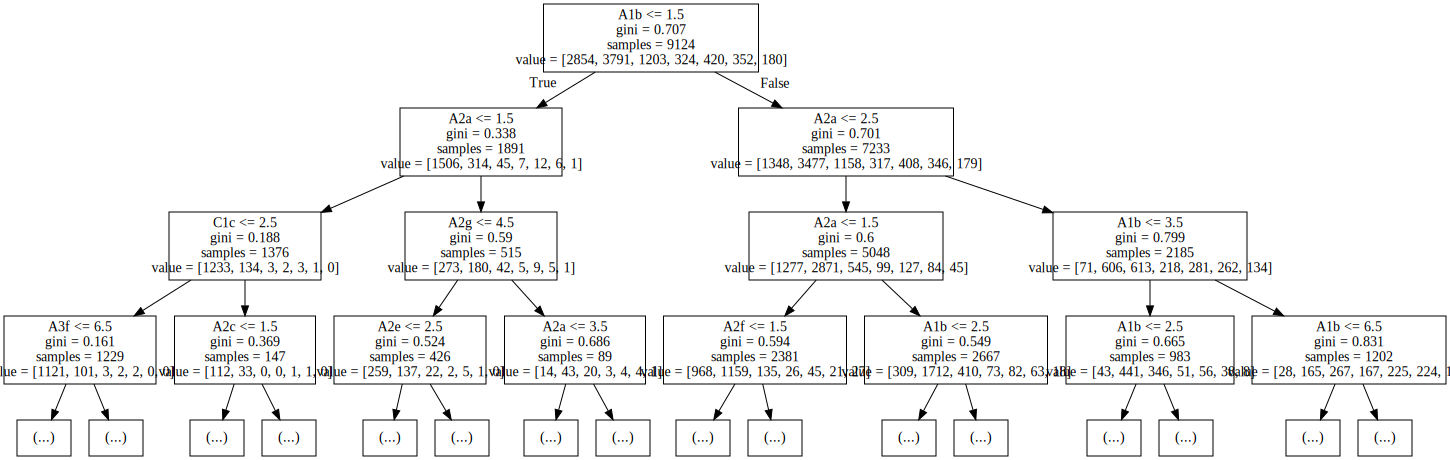

In [31]:
# Create a Graphviz visualisation
import graphviz 
from sklearn.tree import export_graphviz

treeclf.fit(X_train, y_train)
dot_data = export_graphviz(treeclf, out_file=None, feature_names=feature_cols, max_depth = 3)

graph = graphviz.Source(dot_data)  
graph 

**FEATURE IMPORTANCE USING GRADIENT BOOSTING**

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, 
                                min_samples_leaf=4, max_features=0.2, random_state=123)

gb.fit(X_train,y_train)
features = X_train.columns.values
print("----- Training Done -----")

----- Training Done -----


In [33]:
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Machine Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')
plt.show()

In [34]:
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Gradient Boosting Classifer Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 800,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')
plt.show()